*Victorien, Steve, Jeremy et Marceline*

#  **MALADIE CARDIAQUE** 

### **Objectif**
Réaliser l'EDA (Exploraty Data Analysis) <br>
Faire le Pre-processing (Nettoyage des données) <br>
Choisir et justifier un modèle de Machine Learning

In [41]:
import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import numpy
%matplotlib inline
import plotly.express as px
pd.options.mode.chained_assignment = None

 ### 1ère étape : importer les données

In [42]:
mc = pd.read_csv('C:/Users/marce/Documents/formation IA/projet 1/Maladie_cardiac.csv', encoding = "ISO-8859-1", header = 0, sep = ';')

#### Présentation rapide

In [43]:
mc.head()

,AGE,SEXE,TDT,PAR,CHOLESTEROL,GAJ,ECG,FCMAX,ANGINE,DEPRESSION,PENTE,CUR
0,40,homme,AA,140,289,0,Normal,172,Non,0.0,Ascendant,0
1,49,femme,DNA,160,180,0,Normal,156,Non,1.0,Plat,1
2,37,homme,AA,130,283,0,ST,98,Non,0.0,Ascendant,0
3,48,femme,ASY,138,214,0,Normal,108,Oui,1.5,Plat,1
4,54,homme,DNA,150,195,0,Normal,122,Non,0.0,Ascendant,0


In [44]:
mc.describe()

,AGE,PAR,CHOLESTEROL,GAJ,FCMAX,DEPRESSION,CUR
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [45]:
mc.corr()

,AGE,PAR,CHOLESTEROL,GAJ,FCMAX,DEPRESSION,CUR
AGE,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
PAR,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
CHOLESTEROL,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
GAJ,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
FCMAX,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
DEPRESSION,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
CUR,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


#### Nom de colonne au propre

In [46]:
mc.columns=('AGE','SEXE', 'TDT', 'PAR', 'CHOLESTEROL', 'GAJ', 'ECG', 'FCMAX', 'ANGINE', 'DEPRESSION', 'PENTE', 'COEUR')

### 2ème étape : débuter l'analyse..en douceur

In [47]:
mc.shape

(918, 12)

In [48]:
mc.dtypes.value_counts()

int64      6
object     5
float64    1
dtype: int64

### Récap :
variable target : COEUR <br>
lignes et colonnes : 918,12 <br>
types de variables : quantitatives 7, qualitatives : 5

### Analyse de fond <br>
1. Visualisation de la target

In [49]:
mc['COEUR'].value_counts(normalize=True)

1    0.553377
0    0.446623
Name: COEUR, dtype: float64

55 % des personnes ont la présence d'une maladie cardiaque <br>
45 % des personnes n'ont pas la présence d'une maladie cardiaque

 2. Signification des variables
Histograme des variables continues

<Figure size 1800x1080 with 0 Axes>

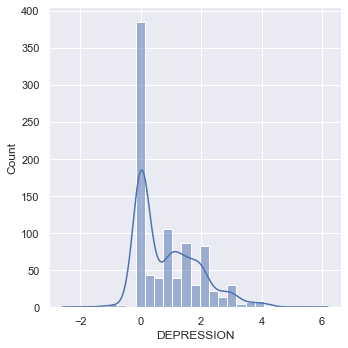

In [62]:
for col in mc.select_dtypes(include=['float', 'int']):
    plt.figure()
    plt.gcf().set_size_inches(25, 15)
    sns.displot(mc[col],kde=True)

**Analyse des variables qualitatives**

In [51]:
for col in mc.select_dtypes(include='object'):
    print(f'{col :-<20} {mc[col].unique()}')

SEXE---------------- ['homme' 'femme']
TDT----------------- ['AA' 'DNA' 'ASY' 'AT']
ECG----------------- ['Normal' 'ST' 'LVH']
ANGINE-------------- ['Non' 'Oui']
PENTE--------------- ['Ascendant' 'Plat' 'Descendant']


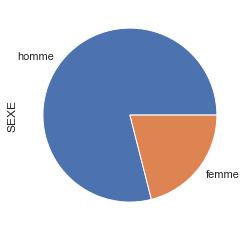

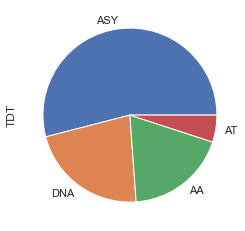

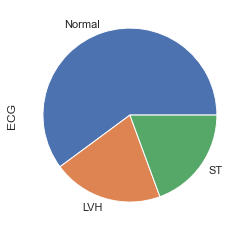

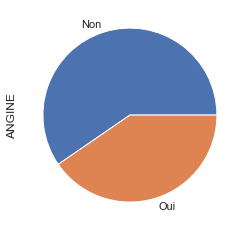

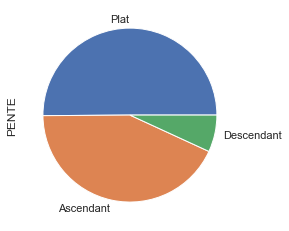

In [52]:
for col in mc.select_dtypes(include='object'):
    plt.figure()
    autopct = lambda x: str(round(x, 2)) + '%',
    pctdistance = 0.7 
    mc[col].value_counts().plot.pie() # graphique camembert

*On a traité les valeurs saines et malades suivant les pathologies*

In [63]:
positive_mc = mc[mc['COEUR'] == 1]
negative_mc = mc[mc['COEUR'] == 0]

#for col in mc:
#    sns.distplot(positive_mc[col], label='malades')
#    sns.distplot(negative_mc[col], label='sains')
#    plt.legend()
    

C:\Users\marce\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\marce\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



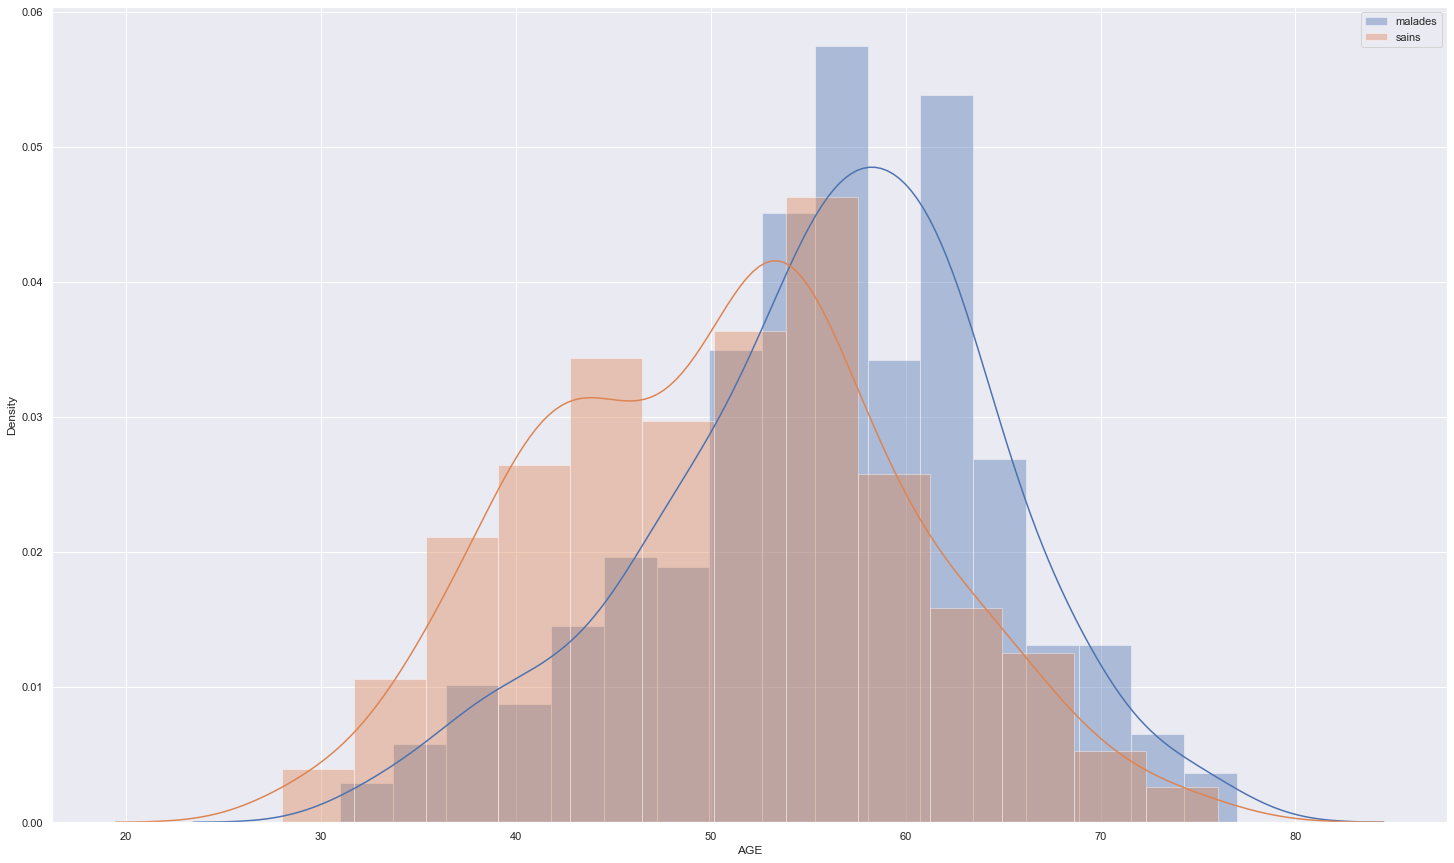

In [54]:
sns.distplot(positive_mc['AGE'], label='malades')
sns.distplot(negative_mc['AGE'], label='sains')
plt.gcf().set_size_inches(25, 15)
plt.legend()

C:\Users\marce\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\marce\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



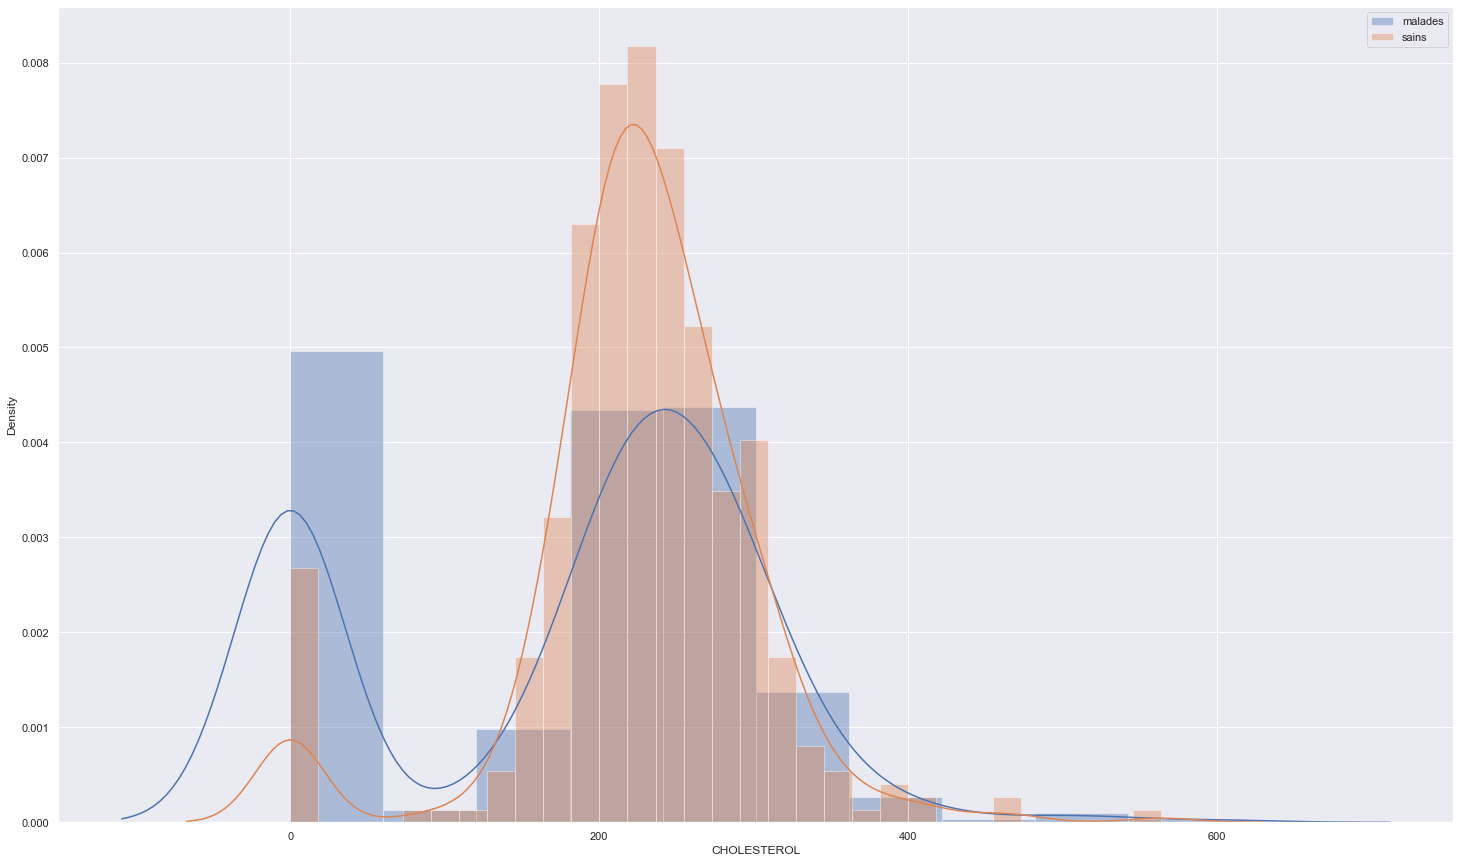

In [55]:
sns.distplot(positive_mc['CHOLESTEROL'], label='malades')
sns.distplot(negative_mc['CHOLESTEROL'], label='sains')
plt.gcf().set_size_inches(25, 15)
plt.legend()

C:\Users\marce\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\marce\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



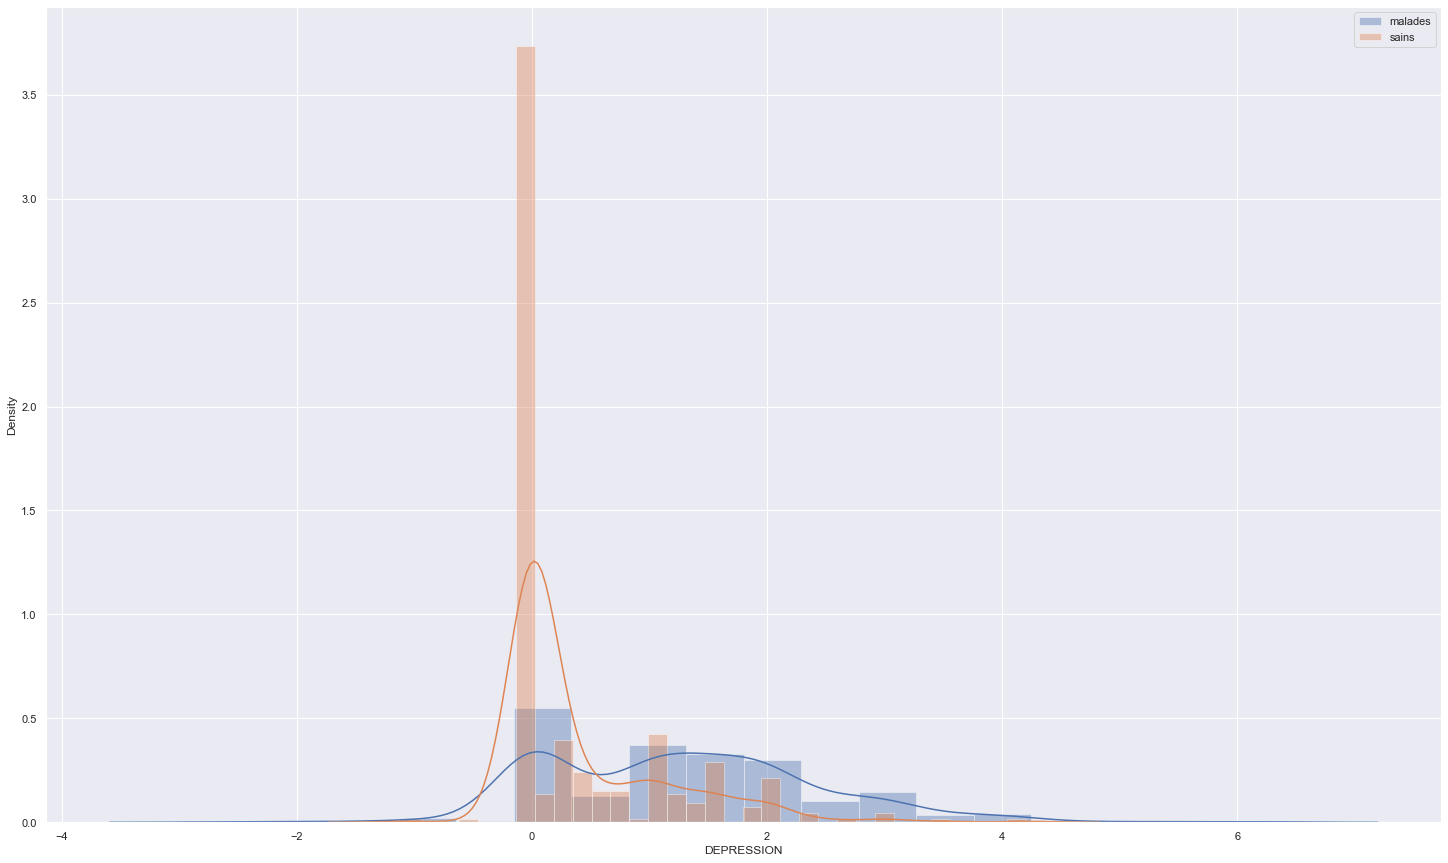

In [56]:
sns.distplot(positive_mc['DEPRESSION'], label='malades')
sns.distplot(negative_mc['DEPRESSION'], label='sains')
plt.gcf().set_size_inches(25, 15)
plt.legend()

*On a recherché les corrélations sur le dataset*

In [57]:
mc['AGE_CATEGORY'] = mc['AGE'] # Créer une nouvelle colonne AGE_CATEGORY
positive_mc['AGE_CATEGORY'] = positive_mc['AGE']
negative_mc['AGE_CATEGORY'] = negative_mc['AGE']

def category_ages(age):
    if (age >= 28) & (age <= 38):
        return '28-38 ans'
    elif (age > 38) & (age <= 49):
        return '38-49 ans'
    elif (age > 49) & (age <= 60):
        return '49-60 ans'
    elif (age > 60) & (age <= 70):
        return '60-70 ans'
    elif (age > 70) & (age <= 77):
        return '70-77 ans'

mc['AGE_CATEGORY'] = mc['AGE_CATEGORY'].map(category_ages)
positive_mc['AGE_CATEGORY'] = positive_mc['AGE_CATEGORY'].map(category_ages)
negative_mc['AGE_CATEGORY'] = negative_mc['AGE_CATEGORY'].map(category_ages)

In [58]:
# Plot heatmap with Pandas
mc.corr().style.background_gradient(cmap='coolwarm', axis=None).set_precision(2).set_properties(**{'font-size': '8pt'})


,AGE,PAR,CHOLESTEROL,GAJ,FCMAX,DEPRESSION,COEUR
AGE,1.00,0.25,-0.10,0.20,-0.38,0.26,0.28
PAR,0.25,1.00,0.10,0.07,-0.11,0.16,0.11
CHOLESTEROL,-0.10,0.10,1.00,-0.26,0.24,0.05,-0.23
GAJ,0.20,0.07,-0.26,1.00,-0.13,0.05,0.27
FCMAX,-0.38,-0.11,0.24,-0.13,1.00,-0.16,-0.40
DEPRESSION,0.26,0.16,0.05,0.05,-0.16,1.00,0.40
COEUR,0.28,0.11,-0.23,0.27,-0.40,0.40,1.00


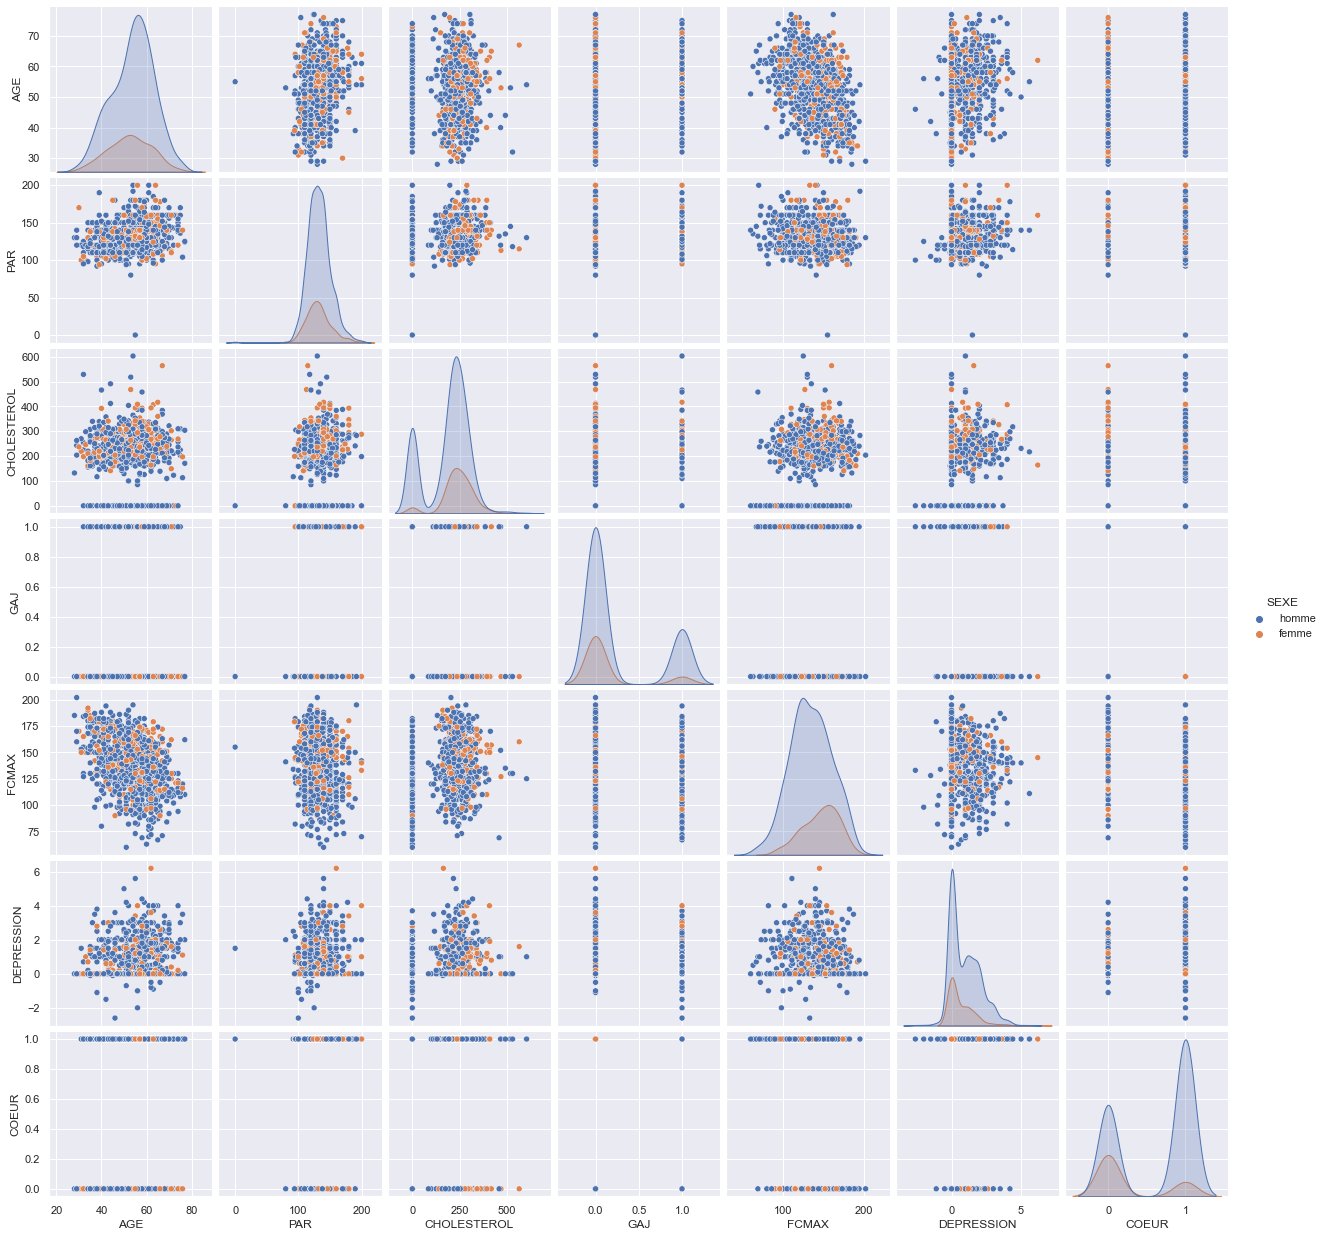

In [59]:
sns.set()
sns.pairplot(mc, hue='SEXE', height=2.5);

In [71]:
mc_malade = mc[mc.COEUR ==1]
fig = px.scatter_3d(mc_malade, x='AGE_CATEGORY', 
                    y='SEXE',
                    size='FCMAX', 
                    z = 'CHOLESTEROL',
                    color='PENTE',
                   title="Répartition des hommes & femmes cardiaques par age celon la fréquence cardiaque et l'angine")

fig.show()

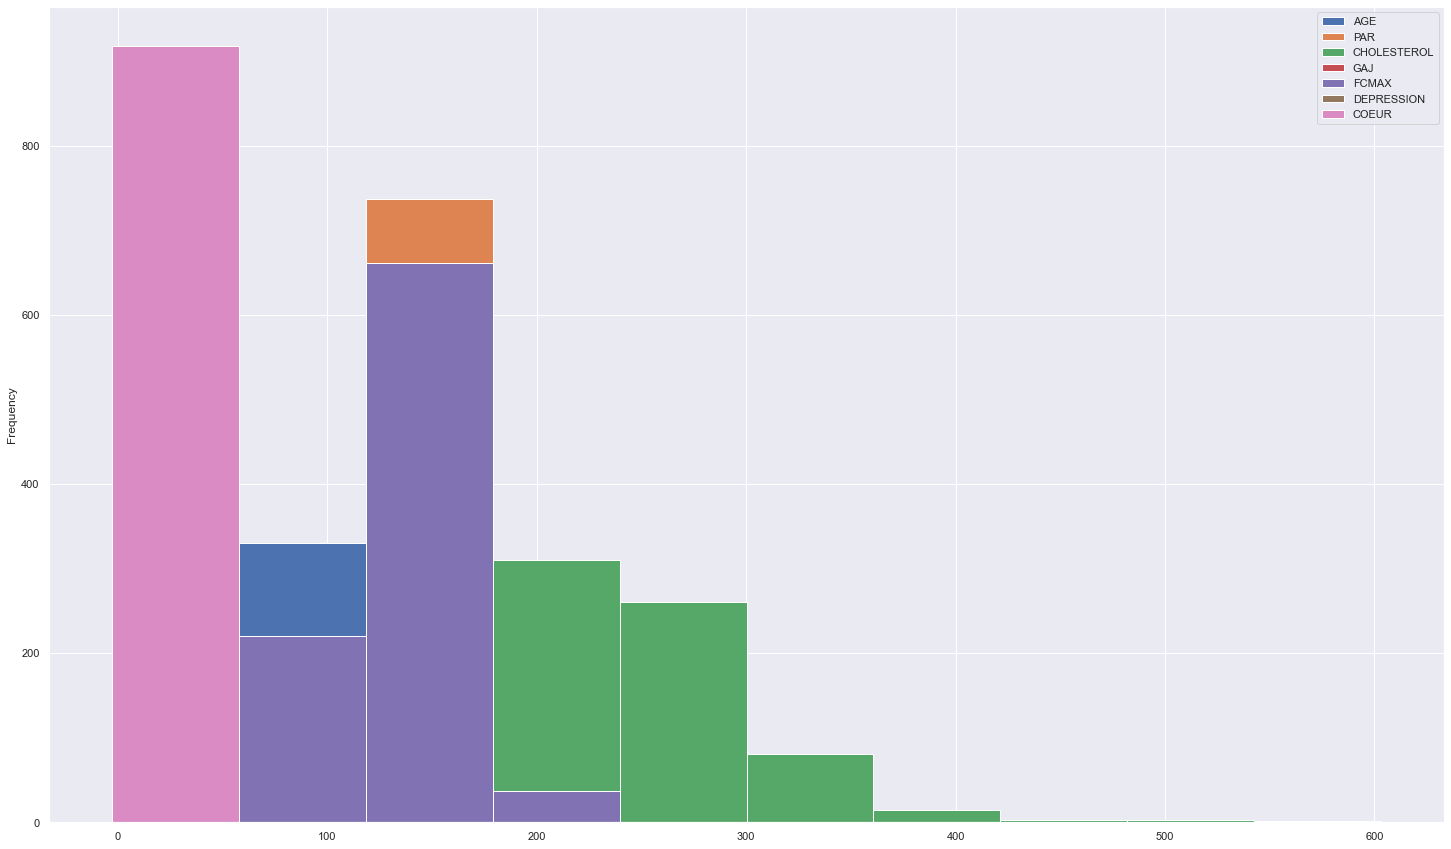

In [61]:
mc.plot.hist()
plt.gcf().set_size_inches(25, 15)

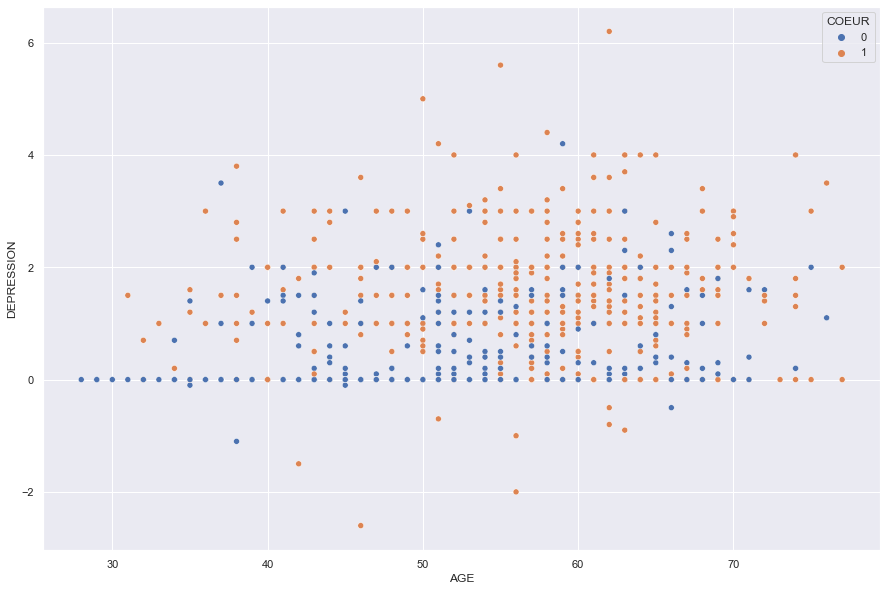

In [66]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(data=mc, x="AGE", y="DEPRESSION", hue="COEUR")
plt.gcf().set_size_inches(15, 10)

Text(0, 0.5, 'Niveau de dépression ST vs maladie cardiaque')

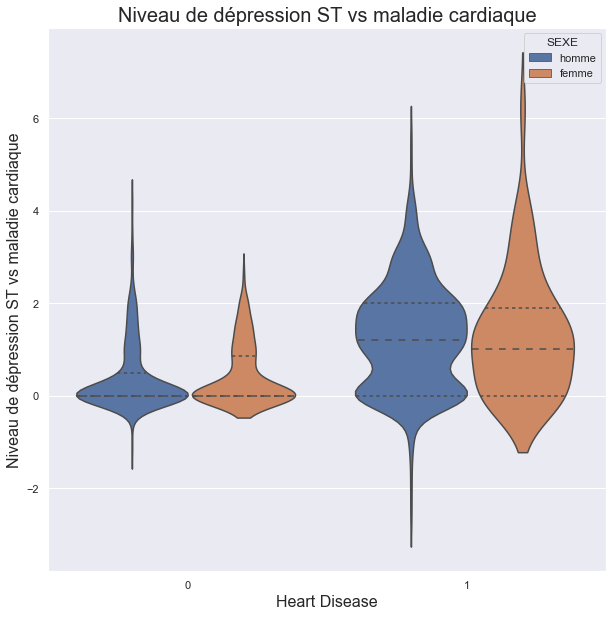

In [69]:
sns.violinplot(y="DEPRESSION", x="COEUR", hue="SEXE", inner='quartile',data=mc )
plt.gcf().set_size_inches(10, 10)
plt.title("Niveau de dépression ST vs maladie cardiaque", fontsize=20)
plt.xlabel("Heart Disease",fontsize=16)
plt.ylabel("Niveau de dépression ST vs maladie cardiaque", fontsize=16)

<AxesSubplot:xlabel='COEUR'>

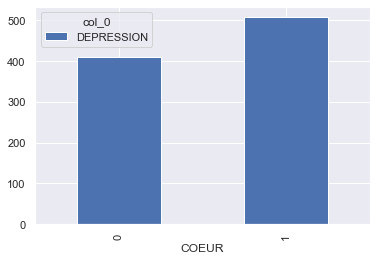

In [23]:
t = pd.crosstab(mc.COEUR, "DEPRESSION")
t.plot.bar()

*La depression est mesurée lors d'un test d'effort, on remarque sur ce graphique que le niveau est plus élévé quand les individus ont une maladie cardiaque.*

Text(0, 0.5, 'FCMAX')

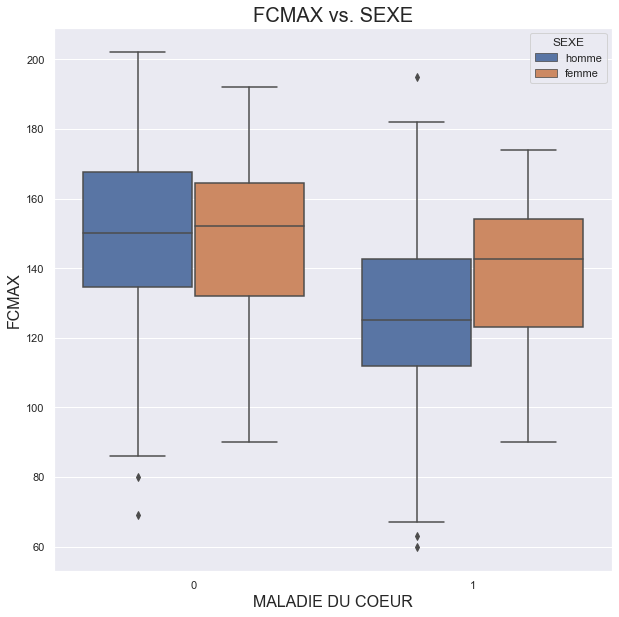

In [70]:
sns.boxplot(x="COEUR", y="FCMAX", hue="SEXE", data=mc )
plt.gcf().set_size_inches(10, 10)
plt.title("FCMAX vs. SEXE", fontsize=20)
plt.xlabel("MALADIE DU COEUR",fontsize=16)
plt.ylabel("FCMAX", fontsize=16)

sns.violinplot(y="DEPRESSION", x="COEUR", hue="SEXE", inner='quartile',data=mc )
plt.gcf().set_size_inches(10, 10)
plt.title("ST depression Level vs. Heart Disease", fontsize=20)
plt.xlabel("Heart Disease",fontsize=16)
plt.ylabel("ST depression induced by exercise relative to rest", fontsize=16)
sns.boxplot(x="COEUR", y="FCMAX", hue="SEXE", data=mc )
plt.gcf().set_size_inches(10, 10)
plt.title("FCMAX vs. SEXE", fontsize=20)
plt.xlabel("MALADIE DU COEUR",fontsize=16)
plt.ylabel("FCMAX", fontsize=16)

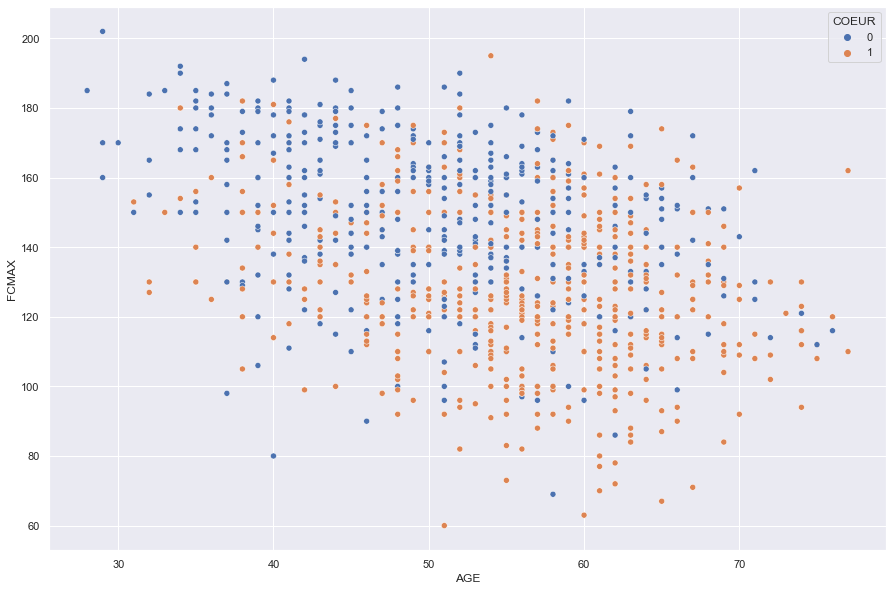

In [67]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(data=mc, x="AGE", y="FCMAX", hue="COEUR")
plt.gcf().set_size_inches(15, 10)

<AxesSubplot:xlabel='AGE_CATEGORY'>

<Figure size 1800x1080 with 0 Axes>

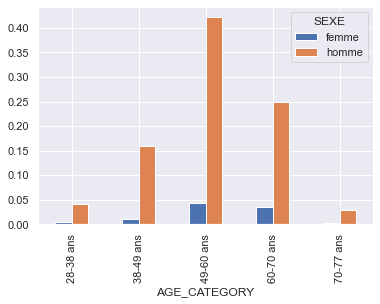

In [24]:
t = pd.crosstab( positive_mc.AGE_CATEGORY, positive_mc.SEXE, normalize=True)
plt.gcf().set_size_inches(25, 15)
t.plot.bar()

<AxesSubplot:xlabel='AGE_CATEGORY'>

<Figure size 1800x1080 with 0 Axes>

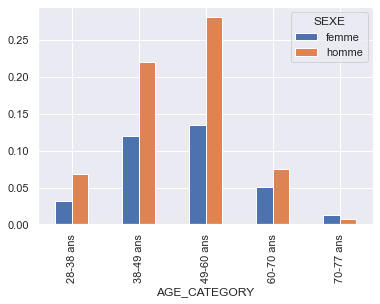

In [25]:
t = pd.crosstab( negative_mc.AGE_CATEGORY, negative_mc.SEXE, normalize=True)
plt.gcf().set_size_inches(25, 15)
t.plot.bar()

*On a comparé les cas malades et non malades par catégories d'ages. Dans les malades, il y a une plus grande proportion d'homme.*

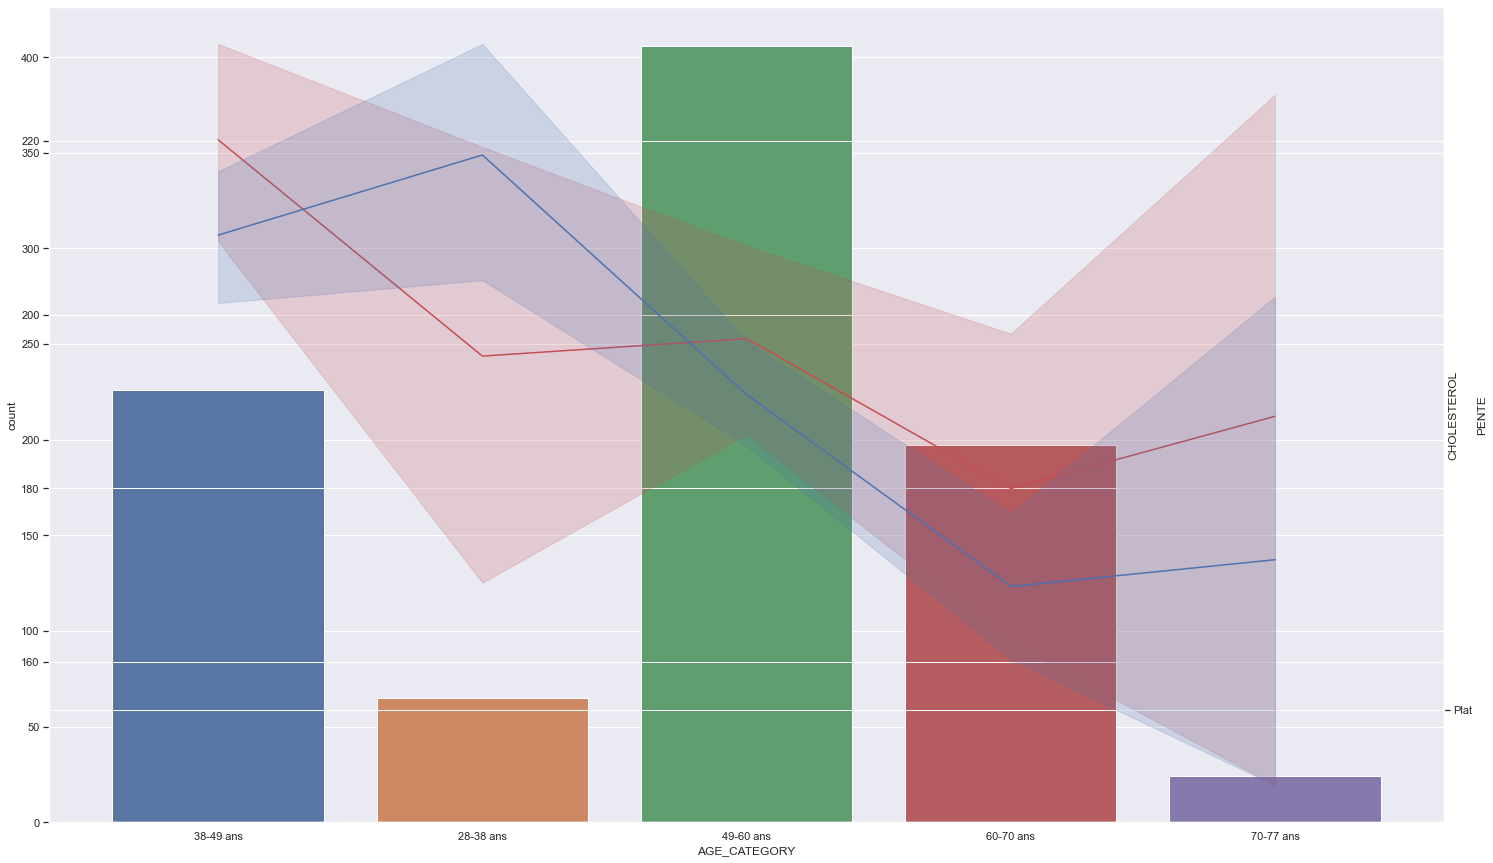

In [26]:
  fig, ax = plt.subplots()
sns.countplot(x=mc['AGE_CATEGORY'], ax=ax)
ax2 = ax.twinx()
sns.lineplot(x=mc['AGE_CATEGORY'],y=mc['CHOLESTEROL'],color='r', ax=ax2)
ax3 = ax2.twinx()
sns.lineplot(x=mc['AGE_CATEGORY'],y=mc['PENTE'],color='b', ax=ax3)
plt.gcf().set_size_inches(25, 15)

### Conclusion :

* **Les hommes sont plus touchés par les maladies cardiaques que les femmes
Plus l’age augmente et plus le risque d’avoir une maladie cardiaque augmente
Plus l’age et la dépression augmente, plus la personne est susceptible d’avoir une maladie cardiaque** *

* **En l’absence de corrélation dans le dataset, nous écartons la possibilité d’un modèle de régression. Le jeu de données étant peu fourni, nous écartons également le modèle de réseaux de neurones. Nous penchons pour une classification, avec des modèles comme le Support Vector Machine ou le k Nearest Neighbors.** *